<a href="https://colab.research.google.com/github/PaulToronto/Hands-on-Maching-Learning-Book/blob/main/3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

## `sklearn.datasets`

- Mostly 3 types of functions:
    1. `fetch_*`: such as `fetch_openml()` for real-life datasets
    2. `load_*`: to load small toy datasets
    3. `make_*`: to generate fake dataset
- Generated datasets are often returned as an `(X,y)` tuple of NumPy arrays
- Other datasets are returned as `sklearn.utils.Bunch` objects which are dictionaries which generally contain the following keys:
    - `"DESCR"`
    - `"data"`, the input data, usually a Numpy Array
    - `"target"`
- `fetch_openml()` returns the inputs as a Pandas DataFrame and the labels as a Pandas Series
    - but the MNIST dataset contains images, so it is best to set `as_frame=False` to get the data as Numpy arrays instead

## MNIST

In [2]:
# from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [5]:
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
X, y = mnist.data, mnist.target

In [7]:
X.shape, X

((70000, 784),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [8]:
y.shape, y

((70000,), array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [9]:
def plot_digit(image_data, label_data=None):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    if label_data:
        plt.title(label_data)

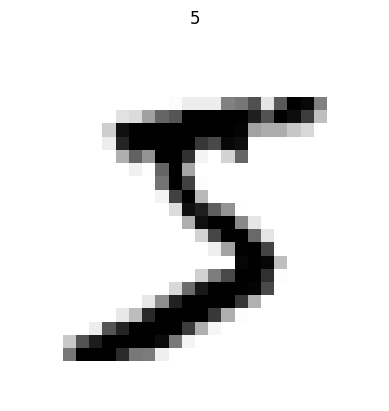

In [10]:
plot_digit(X[0], y[0])

## Train, Test Split

- the MNIST data returned by `fetch_openml()` is already split for us
    - the first 60000 rows are the train set
    - the last 10000 rows are the test set
    - some learning algorithms are sensitive to the order of the training instances
        - the training set is already shuffled for us
        - shuffling is not always a good idea (example: time series data)

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

## Training a Binary Classifier

- We simplify the problem by turning it into a "5" detector, which is a binary classification problem

In [12]:
y_train_5 = y_train == '5'
y_test_5 = y_test == '5'

In [13]:
y_train_5, y_test_5

(array([ True, False, False, ...,  True, False, False]),
 array([False, False, False, ..., False,  True, False]))

### `SGDClassifier()`

- stochastic gradient descent classifier
- capable of handling very large datasets efficiently
    - in part because SGD deals with training instances independently, one at a time, so it is well suited for online learning

In [14]:
# from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict([X[0]])

array([ True])

In [16]:
y[0]

'5'

### Performance Measures

#### Measuring Accuracy Using Cross-Validation

##### `cross_val_score`

In [17]:
# from sklearn.model_selection import cross_val_score


# by default, there is no shuffling so the splits will be
#  the same across calls
cross_val_score(sgd_clf,
                X_train,
                y_train_5,
                cv=3,
                scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

Those seem like a good scores, all over 95%, but the target is imbalanced


In [18]:
pd.Series(y_train_5).value_counts(normalize=True)

False    0.90965
True     0.09035
dtype: float64

It is a good idea to try it with `DummyClassifier`, which, with the default settings, just classifies each images as being in the most frequent class.

In [19]:
# from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

DummyClassifier()

In [20]:
any(dummy_clf.predict(X_train))

False

In [21]:
cross_val_score(dummy_clf,
                X_train,
                y_train_5,
                cv=3,
                scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

The fact that we got over 90% accuracy with the Dummy Classifier demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially with *skewed datasets*. A much better way to evaluate the performce of a classifier is to look at the **confusion matrix (CM)**.

##### Implementing Cross-Validation

- for when you need more control over the cross-validation process
- the following code does roughly the same thing as `cross_val_score()`
- `StratifiedKFold` provides train/test indices to split the data into train/test sets
    - it is a variaation of `KFold` that returns stratified folds
    - the folds are made by preservring the percentage of samples for each class

In [22]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3) # add `shuffle=True` if hte dataset is
                                      # not already shuffled
skfolds

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [23]:
test = list(skfolds.split(X_train, y_train_5))
test

[(array([19964, 19965, 19966, ..., 59997, 59998, 59999]),
  array([    0,     1,     2, ..., 20331, 20342, 20359])),
 (array([    0,     1,     2, ..., 59997, 59998, 59999]),
  array([19964, 19965, 19966, ..., 40088, 40125, 40127])),
 (array([    0,     1,     2, ..., 40088, 40125, 40127]),
  array([39988, 39989, 39990, ..., 59997, 59998, 59999]))]

In [24]:
len(test)

3

In [25]:
len(test[0]), len(test[0][0]), len(test[0][1])

(2, 40000, 20000)

In [26]:
len(test[1]), len(test[1][0]), len(test[1][1])

(2, 40000, 20000)

In [27]:
len(test[2]), len(test[2][0]), len(test[2][1])

(2, 40000, 20000)

In [28]:
X_train.shape, y_train_5.shape # 40000 + 20000

((60000, 784), (60000,))

In [29]:
# I'm not sure why the book example cloned `sgd_clf`
#   - may just to keep it untouched because it
#     is used again in the next section
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


#### Confusion Matrices